In [1]:
import tensorflow as tf 
from tensorflow import keras 
# get data 
(train_images,train_labels),(test_images,test_labels)=\
keras.datasets.mnist.load_data()

# setup model 
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128,activation=tf.nn.relu),
        keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
#train model 
model.fit(train_images,train_labels,epochs=5)

#evaluate
test_loss,test_acc =model.evaluate(test_images,test_labels)
print('test accuracy:',test_acc)

#make prediction
predictions = model.predict(test_images)

11493376/11490434 [==============================] - 3s 0us/step
Epoch 1/5
60000/60000 [==============================] - 5s 77us/step - loss: 8.8283 - acc: 0.4512
Epoch 2/5
60000/60000 [==============================] - 4s 70us/step - loss: 7.2851 - acc: 0.5472
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 7.0195 - acc: 0.5640
Epoch 4/5
60000/60000 [==============================] - 4s 70us/step - loss: 6.9651 - acc: 0.5675
Epoch 5/5
10000/10000 [==============================] - 0s 36us/step
test accuracy: 0.5568


#pip install mxnet (基于所有的环境已经搭建完毕)

In [1]:
import tensorflow as tf
mnist =tf.keras.datasets.mnist #28*28
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)#将原来的数字变为0-1之间

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 8s 126us/step - loss: 0.2631 - acc: 0.9237
Epoch 2/3
60000/60000 [==============================] - 7s 117us/step - loss: 0.1078 - acc: 0.9663
Epoch 3/3
60000/60000 [==============================] - 8s 126us/step - loss: 0.0755 - acc: 0.9769


In [2]:
import matplotlib.pyplot as plt

plt.imshow(x_train[10],cmap=plt.cm.binary)#彩色---heibai
plt.show()
print(x_train[10])

<Figure size 640x480 with 1 Axes>

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [3]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 1s 52us/step
0.09362037131115794 0.9714


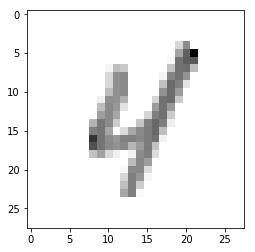

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [4]:
plt.imshow(x_train[166],cmap=plt.cm.binary)#黑白
plt.show()
print(x_train[0])

In [5]:
model.save('epic_num_reader.model')

In [6]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

In [7]:
predictions = new_model.predict([x_test])
print(predictions)

[[3.5322909e-09 1.7576140e-07 4.9371913e-04 ... 9.9840838e-01
  2.8834106e-06 2.3435379e-05]
 [9.3937459e-08 2.7721880e-03 9.9720854e-01 ... 4.6152678e-08
  4.0252647e-07 1.1135558e-11]
 [7.2683974e-08 9.9996221e-01 8.1301723e-06 ... 2.2814620e-05
  4.1541139e-06 9.0283102e-08]
 ...
 [6.8997679e-08 9.1946258e-06 1.3761988e-06 ... 1.7963728e-04
  2.3070999e-05 1.2451023e-03]
 [3.1815709e-08 8.3201263e-07 3.7208732e-09 ... 2.5366097e-07
  1.2844496e-05 7.5158688e-09]
 [7.7600635e-06 8.0990247e-08 5.3645049e-06 ... 1.4600088e-09
  6.0164263e-07 4.8232888e-08]]


In [8]:
import numpy as np 
print(np.argmax(predictions[199]))

2


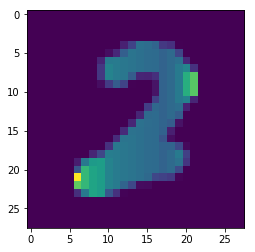

In [9]:
plt.imshow(x_test[199])
plt.show()

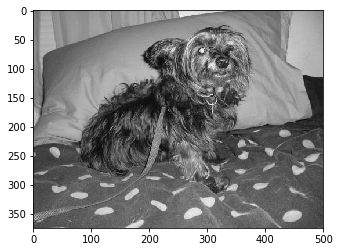

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "F:/KDATA/PetImages"
CATEGORIES = ["Dog","Cat"]

for category in CATEGORIES :
    path = os.path.join(DATADIR,category) #path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [11]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


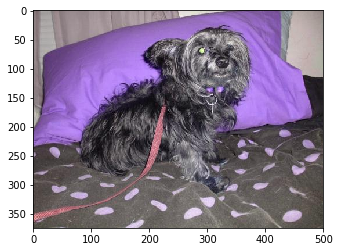

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "F:/KDATA/PetImages"
CATEGORIES = ["Dog","Cat"]

for category in CATEGORIES :
    path = os.path.join(DATADIR,category) #path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [13]:
print(img_array) #显示RGB的格式
print(img_array.shape)

[[[126 115 117]
  [126 115 117]
  [130 117 119]
  ...
  [142 132 132]
  [141 131 131]
  [141 131 131]]

 [[127 116 118]
  [126 115 117]
  [130 117 119]
  ...
  [144 134 134]
  [143 133 133]
  [143 133 133]]

 [[128 117 119]
  [127 116 118]
  [131 118 120]
  ...
  [146 136 136]
  [145 135 135]
  [145 135 135]]

 ...

 [[ 84  80  75]
  [ 79  75  70]
  [ 78  74  69]
  ...
  [ 85  82  74]
  [ 81  78  70]
  [ 78  75  67]]

 [[ 83  79  74]
  [ 77  73  68]
  [ 74  70  65]
  ...
  [ 77  74  66]
  [ 78  75  67]
  [ 79  76  68]]

 [[ 79  75  70]
  [ 76  72  67]
  [ 75  71  66]
  ...
  [ 80  77  69]
  [ 78  75  67]
  [ 76  73  65]]]
(375, 500, 3)


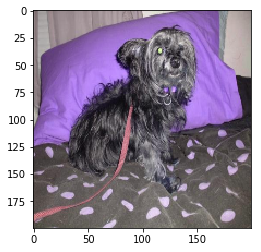

In [14]:
IMG_SIZE =200
new_array =cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [15]:
training_data =[]
def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR,category) #path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array =cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array =cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()                

In [16]:
print(len(training_data))

24946


In [17]:
import random
random.shuffle(training_data)

In [18]:
for sample in training_data:
    print(sample[1])

1
1
0
1
1
1
1
0
0
0
1
0
0
0
1
1
1
0
1
1
0
1
1
1
0
0
0
1
0
1
0
1
1
0
1
1
1
1
1
0
0
0
0
1
0
1
1
0
0
1
1
0
1
0
1
0
0
0
1
1
1
1
0
1
1
0
1
0
1
1
0
1
1
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
0
1
0
0
0
0
0
1
0
0
1
0
1
0
1
1
1
1
1
0
1
1
1
0
0
1
0
0
0
0
1
1
1
1
1
0
0
0
1
1
0
1
0
0
0
1
0
1
1
1
0
1
1
0
0
1
0
1
0
1
1
1
0
0
1
0
1
1
0
0
0
1
0
0
1
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
1
0
1
1
1
0
1
0
0
0
1
1
1
0
0
1
0
1
1
1
0
1
0
1
0
0
1
0
1
0
1
1
0
0
1
1
1
1
0
1
1
1
1
0
1
0
0
0
1
1
0
0
0
1
0
1
0
1
0
1
1
1
0
0
0
1
1
1
1
0
0
0
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
1
0
0
1
1
0
1
0
0
1
0
0
1
1
1
0
1
1
0
0
0
0
0
1
1
1
1
1
0
1
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
1
1
1
0
1
1
0
0
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
0
1
1
1
1
0
0
1
0
1
0
0
0
0
1
1
1
0
1
1
0
0
0
1
0
0
0
1
1
0
0
1
0
0
0
1
0
1
0
1
0
0
0
1
0
1
1
1
0
1
0
1
1
0
0
1
0
0
1
1
1
1
1
1
0
0
0
1
0
0
1
1
1
0
0
1
1
0
0
1
1
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
1
0
1
1
1
1
1
0
0
1
1
0
0
1
0
0
1
1
1
1
0
0
0
1
0
0
1
0
0
0
1
0
1
1
1
0
1
0
1
1
1
1
1
0
0
1
1
0
0
1
0
0
0
1
1
1
1
1
1
1
0
1
0
0
1
0


1
1
1
0
0
1
0
0
1
1
1
0
1
0
1
0
1
1
1
0
0
1
0
0
0
0
1
1
0
1
1
1
0
1
0
0
1
1
0
1
1
1
1
1
0
1
0
1
1
1
1
0
0
1
0
1
1
0
1
0
1
1
0
1
0
0
0
1
0
1
1
0
0
0
1
0
1
0
0
1
1
0
1
1
0
0
0
0
0
1
0
1
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
1
0
1
1
0
0
1
1
0
0
1
0
0
0
0
0
1
0
1
0
1
1
1
0
1
1
0
0
0
1
1
1
1
0
0
1
0
0
1
0
0
0
1
0
1
1
0
0
0
1
1
0
1
0
0
0
1
0
1
1
1
0
0
1
1
0
0
1
1
0
0
0
1
1
1
0
0
0
1
0
1
0
0
1
1
1
1
1
1
0
1
0
0
1
1
0
0
0
0
0
1
1
1
1
0
1
0
1
1
0
1
0
0
1
1
1
1
1
0
1
1
0
1
1
0
0
1
0
0
1
0
0
0
1
1
1
1
0
1
1
1
1
0
0
1
1
0
0
1
1
1
1
1
1
1
0
1
0
0
1
1
1
1
0
1
1
0
0
1
0
0
0
1
1
1
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
1
1
0
1
1
0
0
1
1
0
0
0
1
0
0
1
0
1
1
0
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
1
0
1
1
1
0
0
1
0
0
0
1
1
0
1
1
0
0
1
1
0
0
0
0
0
1
1
1
0
0
0
1
1
0
1
1
0
1
1
1
0
0
0
1
0
0
1
1
0
0
0
1
1
0
1
1
0
1
1
1
1
1
1
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
1
1
0
0
1
1
1
1
0
0
0
0
1
0
0
1
1
0
1
1
0
0
0
0
0
0
1
1
0
0
1
1
0
1
1
1
0
1
0
1
1
1
1
0
0
1
0
0
0
0
0
0
1
0
1
0
0
1


1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
0
0
0
0
1
0
0
1
1
1
0
0
1
1
0
1
1
0
0
0
1
0
0
0
1
1
0
0
1
0
1
1
1
0
0
0
0
0
1
0
0
1
0
0
1
0
1
1
0
0
0
1
0
0
1
1
1
1
1
1
0
0
0
0
1
1
0
0
1
0
1
1
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
1
1
1
0
1
1
0
1
1
1
1
0
1
0
1
1
0
1
1
1
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1
0
0
1
1
1
0
1
0
1
1
0
1
1
1
0
1
1
1
1
0
0
0
0
1
0
1
1
1
0
1
1
0
1
0
1
1
0
0
0
1
0
0
0
1
0
0
1
1
0
1
0
1
1
1
1
0
1
0
1
1
1
1
1
0
0
0
1
1
0
0
1
1
0
1
0
1
1
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
1
0
1
1
0
0
0
1
1
1
1
1
0
1
0
1
0
1
1
1
1
0
0
1
0
0
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
0
0
1
0
0
1
1
0
1
0
0
0
1
0
1
0
1
0
0
0
0
0
1
1
0
0
1
1
1
0
1
0
0
0
0
0
0
0
1
0
1
1
1
1
1
1
1
0
1
0
0
0
1
0
1
0
1
1
1
0
1
1
1
0
0
1
1
0
1
0
0
1
1
0
1
0
1
0
1
1
0
0
1
1
1
1
0
1
1
1
0
1
1
1
0
0
0
1
0
0
0
1
0
1
0
0
1
1
1
0
0
0
1
1
0
1
1
1
0
1
1
1
0
1
1
0
0
1
0
0
1
0
0
1
1
1
1
0
1
0
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
0
1
0
0
0
1
1
1
1
1
1
1
0
0
0
0
0
0
0
1
1
0
0
1
0
1
1
1
1
0
0
0
1
1
0
0
0
0
1
0
0
1
0
0
1
1
1
0
0
0
0
1
0
0
1
1
1
0
1
1
0
0
0
0
1
1


1
1
1
1
0
0
1
1
0
0
1
1
0
1
1
1
1
1
1
0
1
0
0
0
1
0
0
0
0
0
0
0
1
1
0
1
1
0
0
1
0
1
0
1
0
0
1
0
1
1
1
0
1
0
0
1
0
1
0
1
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1
1
1
1
0
0
0
0
1
0
1
0
0
1
0
1
0
0
0
1
1
0
1
0
1
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
1
0
0
0
1
1
0
0
0
1
1
1
1
1
1
0
0
0
0
0
1
0
0
1
0
0
1
1
1
1
0
0
0
0
0
1
1
0
1
0
0
1
1
1
1
0
0
1
0
1
1
1
0
0
1
0
1
0
1
0
1
1
1
0
0
0
1
1
0
0
0
0
0
1
1
0
1
0
0
1
0
1
0
1
0
1
1
1
1
0
0
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
0
1
0
0
1
0
0
0
1
1
0
0
0
1
1
1
0
1
0
0
1
1
1
1
1
1
0
1
1
0
1
1
0
1
1
0
1
0
0
0
1
0
0
1
0
1
0
1
1
0
1
1
1
1
0
1
0
1
0
0
0
0
0
0
1
0
0
0
1
1
1
0
1
1
0
0
1
1
0
1
0
0
1
1
0
1
0
0
0
0
1
0
0
1
1
1
0
0
1
0
0
1
1
1
0
1
0
1
1
0
1
0
0
1
0
1
0
0
1
0
1
1
1
1
1
1
0
0
0
1
0
0
1
1
1
0
1
1
0
0
0
0
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
1
1
0
0
1
1
0
0
1
0
1
1
1
1
0
0
0
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
0
0
0
1
0
1
1
0
1
0
1
1
0
1
1
1
0
1
0
1
0
1
1
1
1
1
0
1
0
0
1
1
1


0
0
0
0
0
0
1
0
1
1
0
0
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
0
0
1
0
1
0
0
0
1
0
0
0
1
1
1
0
1
0
0
1
0
1
0
1
1
1
1
0
0
0
1
0
1
0
1
1
1
0
1
0
1
1
0
0
1
1
1
0
1
0
0
0
1
1
0
1
1
1
1
1
1
0
1
0
1
0
0
0
1
1
1
1
1
1
1
0
0
1
1
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
0
1
0
1
0
0
0
1
0
0
0
0
1
1
1
1
0
1
1
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
1
1
0
0
0
1
1
1
0
0
0
1
0
1
0
1
1
1
0
1
0
0
1
0
0
0
0
1
0
0
0
1
0
1
1
0
0
0
1
1
0
1
1
0
1
0
1
0
0
0
1
0
1
1
1
1
1
1
1
1
0
1
0
0
1
1
0
1
0
0
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
1
1
1
0
1
0
0
0
1
1
1
1
0
1
0
0
1
1
0
1
0
1
1
1
0
0
1
0
1
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
1
0
0
0
1
1
1
1
1
0
0
0
0
1
1
1
0
1
0
0
1
1
1
0
0
1
0
0
1
1
1
1
1
1
0
0
1
1
1
1
0
1
1
0
1
1
0
0
0
0
0
0
1
1
1
0
1
1
1
0
1
0
1
1
0
1
1
0
1
0
1
0
0
1
1
0
1
0
1
1
1
1
1
0
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
1
1
1
0
1
0
0
1
1
0
1
0
1
1
0
0
1
0
1
1
0
1
0
0
0
0
1
1
1
0
0
1
0
1
0
1
0
0
0
1
1
0
1
1
1
0
0
1
1
1
0
1
0
0
1
0
0
1
0
0
0
0
0
1
1
1
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
1
1
1
0
0
1
1
0
0
1
1
0
1
1
1
1
0
0


0
0
1
1
0
0
0
0
0
0
0
1
1
0
0
1
1
0
0
0
1
1
0
1
0
1
1
1
0
0
1
0
0
0
0
1
0
0
0
1
1
0
1
0
1
1
0
0
1
0
1
0
1
0
1
1
1
1
0
1
1
1
0
1
0
1
0
0
0
1
0
1
0
0
0
1
1
1
0
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
1
0
0
1
1
1
0
0
0
0
0
0
0
1
1
0
1
0
1
0
1
1
1
1
1
0
1
1
1
0
0
1
1
0
0
0
0
1
1
0
1
1
1
1
0
0
0
0
1
0
0
1
0
1
1
1
1
1
0
0
1
1
1
0
0
1
0
0
0
0
1
1
1
1
0
1
1
1
1
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
1
1
1
0
0
1
1
1
1
1
0
0
0
0
0
0
1
1
0
1
0
1
1
1
1
1
1
1
0
0
0
0
0
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
0
1
0
0
0
0
1
0
0
1
0
1
1
0
1
0
0
1
0
0
1
0
1
1
0
0
0
0
0
1
0
1
1
0
1
0
1
1
0
0
1
0
0
1
0
1
0
0
1
1
0
0
1
0
1
0
1
0
0
1
1
0
1
0
1
1
1
0
0
1
1
0
1
0
0
1
1
1
0
1
1
0
0
1
0
1
0
0
1
1
1
0
0
0
0
1
0
0
0
0
1
1
1
0
1
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
0
1
1
0
0
0
1
0
0
0
0
1
1
0
1
1
1
0
0
1
1
1
0
0
0
1
0
0
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
0
0
1
1
0
1
1
1
1
0
0
1
0
1
0
1
0
1
1
0
1
0
0
0
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
0
1
1
1
1
1
0
0
0
0
0
0
1
1
0
0
0
1
1


In [19]:
X=[]
y=[]

In [20]:
for features,label in training_data:
    X.append(features)
    y.append(label)
X= np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [21]:
import pickle

pickle_out =open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out =open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [22]:
pickle_in = open('X.pickle','rb')
X=pickle.load(pickle_in)

In [23]:
X

array([[[[ 75],
         [ 79],
         [ 77],
         ...,
         [102],
         [102],
         [101]],

        [[ 72],
         [ 78],
         [ 79],
         ...,
         [103],
         [101],
         [100]],

        [[ 70],
         [ 77],
         [ 79],
         ...,
         [104],
         [102],
         [102]],

        ...,

        [[ 43],
         [ 46],
         [ 48],
         ...,
         [ 63],
         [ 61],
         [ 62]],

        [[ 43],
         [ 46],
         [ 48],
         ...,
         [ 61],
         [ 60],
         [ 60]],

        [[ 43],
         [ 45],
         [ 45],
         ...,
         [ 60],
         [ 58],
         [ 58]]],


       [[[164],
         [162],
         [162],
         ...,
         [197],
         [198],
         [199]],

        [[164],
         [162],
         [162],
         ...,
         [198],
         [199],
         [199]],

        [[165],
         [163],
         [162],
         ...,
         [198],
         [

In [24]:
X[1]

array([[[164],
        [162],
        [162],
        ...,
        [197],
        [198],
        [199]],

       [[164],
        [162],
        [162],
        ...,
        [198],
        [199],
        [199]],

       [[165],
        [163],
        [162],
        ...,
        [198],
        [198],
        [198]],

       ...,

       [[119],
        [119],
        [119],
        ...,
        [217],
        [218],
        [219]],

       [[119],
        [119],
        [119],
        ...,
        [216],
        [217],
        [218]],

       [[118],
        [119],
        [119],
        ...,
        [217],
        [218],
        [218]]], dtype=uint8)

In [ ]:
dump.pickle_in